## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [ ]:
!pip install openpyxl

## Get the data

### Read a CSV file from a website into a DataFrame

In [1]:
import pandas as pd
import numpy as np

#eia2022.csv was retrieved from the U.S. Energy Information Administration API using code in EIA_Electricity.ipynb
csv_path = 'eia2022.csv'

eia_data = pd.read_csv(csv_path, low_memory=False)
eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')


* Net generation:  The amount of gross generation less the electrical energy consumed at the generating station(s) for station service or auxiliaries. Note: Electricity required for pumping at pumped-storage plants is regarded as electricity for station service and is deducted from gross generation.
* Interchange (electric):  Energy transfers that cross Balancing Authority boundaries.
* Electricity demand:  The rate at which energy is delivered to loads and scheduling points by generation, transmission, and distribution facilities.

In [2]:
eia_data['datetime'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')

In [3]:
type(eia_data)

pandas.core.frame.DataFrame

In [4]:
eia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503256 entries, 0 to 2503255
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   period           object        
 1   respondent       object        
 2   respondent-name  object        
 3   type             object        
 4   type-name        object        
 5   value            float64       
 6   value-units      object        
 7   datetime         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 152.8+ MB


In [5]:
eia_data.head(1000)

,period,respondent,respondent-name,type,type-name,value,value-units,datetime
0,2023-01-01T00,JEA,JEA,TI,Total interchange,-300.0,megawatthours,2023-01-01 00:00:00
1,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",DF,Day-ahead demand forecast,2450.0,megawatthours,2023-01-01 00:00:00
2,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",TI,Total interchange,255.0,megawatthours,2023-01-01 00:00:00
3,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",D,Demand,2500.0,megawatthours,2023-01-01 00:00:00
4,2023-01-01T00,FMPP,Florida Municipal Power Pool,TI,Total interchange,-42.0,megawatthours,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
995,2022-12-31T21,CENT,Central,TI,Total interchange,-84.0,megawatthours,2022-12-31 21:00:00
996,2022-12-31T21,CAR,Carolinas,NG,Net generation,22255.0,megawatthours,2022-12-31 21:00:00
997,2022-12-31T21,IPCO,Idaho Power Company,TI,Total interchange,-872.0,megawatthours,2022-12-31 21:00:00
998,2022-12-31T21,WACM,Western Area Power Administration - Rocky Moun...,NG,Net generation,4269.0,megawatthours,2022-12-31 21:00:00


<Axes: xlabel='datetime'>

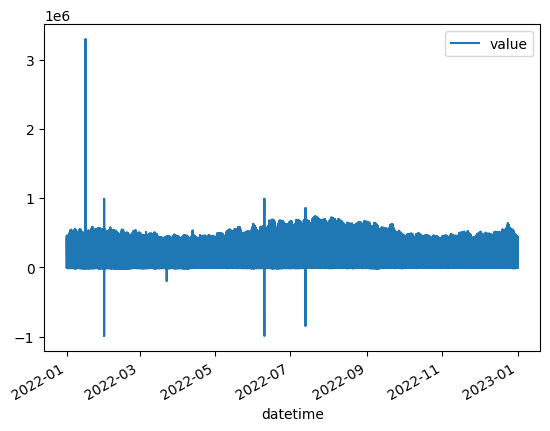

In [6]:
eia_data.plot.line(x='datetime', y = "value")

In [12]:
# SELECT [Age Group] , Year, COUNT(*) GROUP BY [Age Group], Year
# instead count unique combinations of type-name and respondent
eia_data[['type-name','respondent']].value_counts()

type-name                  respondent
Demand                     AZPS          8848
                           IID           8845
                           WAUW          8844
                           SCL           8843
                           GVL           8843
                                         ... 
Total interchange          PNM           8206
Net generation             GLHB          5802
Total interchange          GLHB          5717
Day-ahead demand forecast  SRP           4708
type-name                  respondent       1
Name: count, Length: 289, dtype: int64

In [13]:
#some blank values of type-name, looks like the same for type id
eia_data[['type','respondent']].value_counts()

type  respondent
D     AZPS          8848
      IID           8845
      WAUW          8844
      NYIS          8843
      SCL           8843
                    ... 
TI    PNM           8206
NG    GLHB          5802
TI    GLHB          5717
DF    SRP           4708
type  respondent       1
Name: count, Length: 289, dtype: int64

In [52]:
eia_data['respondent_name'].value_counts()
eia_data['respondent_name'].value_counts().to_csv('respondents.csv')


### Save and restore a DataFrame

In [7]:
eia_data.to_pickle('eia_data.pkl')

In [8]:
eia_data = pd.read_pickle('eia_data.pkl')

In [9]:
eia_data.head()

,period,respondent,respondent-name,type,type-name,value,value-units,datetime
0,2023-01-01T00,JEA,JEA,TI,Total interchange,-300.0,megawatthours,2023-01-01
1,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",DF,Day-ahead demand forecast,2450.0,megawatthours,2023-01-01
2,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",TI,Total interchange,255.0,megawatthours,2023-01-01
3,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",D,Demand,2500.0,megawatthours,2023-01-01
4,2023-01-01T00,FMPP,Florida Municipal Power Pool,TI,Total interchange,-42.0,megawatthours,2023-01-01


## Examine and clean the data

In [10]:
print("Index:  ", eia_data.index)
print("Columns:", eia_data.columns)
print("Size:   ", eia_data.size)
print("Shape:  ", eia_data.shape)

Index:   RangeIndex(start=0, stop=2503256, step=1)
Columns: Index(['period', 'respondent', 'respondent-name', 'type', 'type-name', 'value',
       'value-units', 'datetime'],
      dtype='object')
Size:    20026048
Shape:   (2503256, 8)


### Use the columns attribute to replace spaces with nothing


In [11]:
#changed - to _ instead
eia_data.columns = eia_data.columns.str.replace('-', '_')
eia_data.columns

Index(['period', 'respondent', 'respondent_name', 'type', 'type_name', 'value',
       'value_units', 'datetime'],
      dtype='object')

In [12]:
eia_data.head()

,period,respondent,respondent_name,type,type_name,value,value_units,datetime
0,2023-01-01T00,JEA,JEA,TI,Total interchange,-300.0,megawatthours,2023-01-01
1,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",DF,Day-ahead demand forecast,2450.0,megawatthours,2023-01-01
2,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",TI,Total interchange,255.0,megawatthours,2023-01-01
3,2023-01-01T00,SCEG,"Dominion Energy South Carolina, Inc.",D,Demand,2500.0,megawatthours,2023-01-01
4,2023-01-01T00,FMPP,Florida Municipal Power Pool,TI,Total interchange,-42.0,megawatthours,2023-01-01


In [13]:
eia_data.describe().T

,count,mean,min,25%,50%,75%,max,std
value,2501916.0,14754.563427,-989940.0,230.0,1634.0,10920.0,3297048.0,51572.679781
datetime,2503255,2022-07-02 09:08:07.700692224,2022-01-01 00:00:00,2022-04-02 14:00:00,2022-07-02 11:00:00,2022-10-01 13:00:00,2023-01-01 00:00:00,NaN


In [15]:
eia_data.describe(include=["O"]).T

,count,unique,top,freq
period,2503256,8739,2022-01-01T00,288
respondent,2503256,78,DOPD,35007
respondent_name,2503256,78,PUD No. 1 of Douglas County,35007
type,2503256,5,NG,667063
type_name,2503256,5,Net generation,667063
value_units,2503256,2,megawatthours,2503255


In [21]:
print(len(eia_data.datetime.value_counts())) #count of unique values; not much use in this case
print(365*24)

8738
8760


<Axes: >

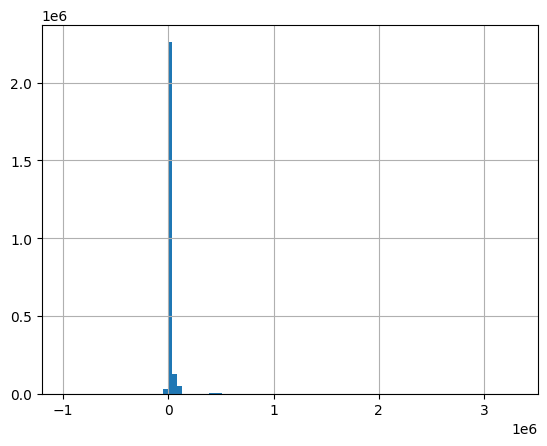

In [29]:
eia_data.value.hist(bins=100)

<Axes: >

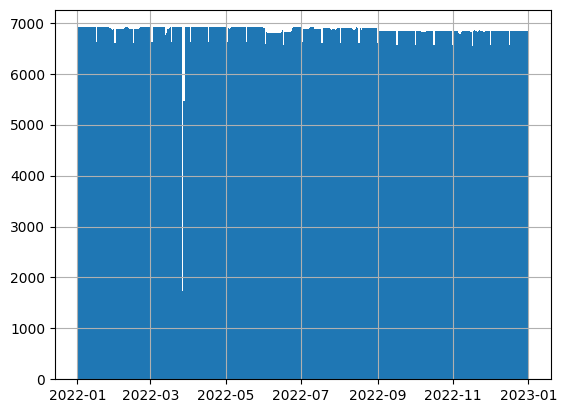

In [32]:
eia_data.datetime.hist(bins=366)

In [33]:
import numpy as np

#mortality_data['death_log']= np.log10(mortality_data['DeathRate'])

In [ ]:
#mortality_data.death_log.hist(bins=50)

In [ ]:
#mortality_data.DeathRate.hist(bins=50)

In [ ]:
#mortality_data.describe(include='O')

In [ ]:
#mortality_data.describe().T

## Access the data

<Axes: >

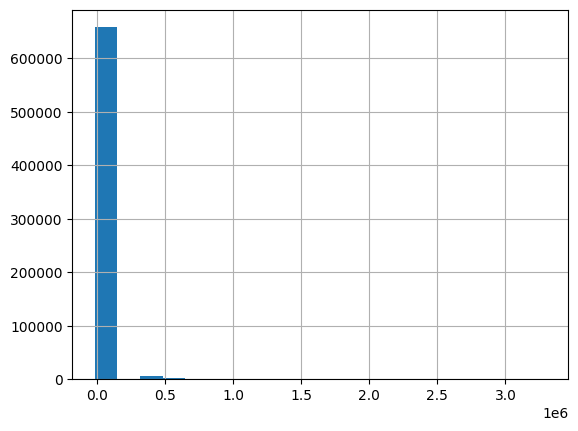

In [44]:
eia_data.query("type == 'NG'").value.hist(bins=20)

<Axes: >

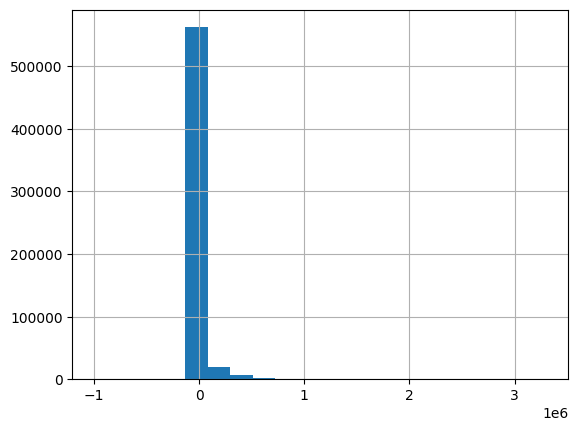

In [43]:
eia_data.query("type == 'D'").value.hist(bins=20)

In [48]:
eia_data.query('20220401 < datetime < 20220402').head()

,period,respondent,respondent_name,type,type_name,value,value_units,datetime
1881740,2022-04-01T23,NE,New England,D,Demand,13002.0,megawatthours,2022-04-01 23:00:00
1881741,2022-04-01T23,TEN,Tennessee,TI,Total interchange,-1126.0,megawatthours,2022-04-01 23:00:00
1881742,2022-04-01T23,NY,New York,DF,Day-ahead demand forecast,17029.0,megawatthours,2022-04-01 23:00:00
1881743,2022-04-01T23,TEX,Texas,D,Demand,44322.0,megawatthours,2022-04-01 23:00:00
1881744,2022-04-01T23,NE,New England,TI,Total interchange,-1369.0,megawatthours,2022-04-01 23:00:00


In [59]:
eia_data.query('respondent == "CISO"').head()

,period,respondent,respondent_name,type,type_name,value,value_units,datetime
32,2023-01-01T00,CISO,California Independent System Operator,D,Demand,24007.0,megawatthours,2023-01-01 00:00:00
72,2023-01-01T00,CISO,California Independent System Operator,TI,Total interchange,-6110.0,megawatthours,2023-01-01 00:00:00
92,2023-01-01T00,CISO,California Independent System Operator,DF,Day-ahead demand forecast,23703.0,megawatthours,2023-01-01 00:00:00
264,2023-01-01T00,CISO,California Independent System Operator,NG,Net generation,18024.0,megawatthours,2023-01-01 00:00:00
318,2022-12-31T23,CISO,California Independent System Operator,D,Demand,24051.0,megawatthours,2022-12-31 23:00:00


In [ ]:
# use backticks if a column name contains spaces
#mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

### Access a subset of rows and columns

In [56]:
eia_data.query('respondent_name == "Bonneville Power Administration"').value.head()

26     6997.0
100    7257.0
139    9792.0
283    7509.0
351    6951.0
Name: value, dtype: float64

In [55]:
eia_data.query('respondent_name == "Bonneville Power Administration"')[['type', 'value']].head()

,type,value
26,D,6997.0
100,DF,7257.0
139,NG,9792.0
283,TI,7509.0
351,D,6951.0


In [58]:
eia_data.query('20220401 <= datetime < 20220501 and respondent_name == "Bonneville Power Administration"') \
    [['datetime','value']].head()

,datetime,value
1681304,2022-04-30 23:00:00,5817.0
1681429,2022-04-30 23:00:00,5668.0
1681432,2022-04-30 23:00:00,2862.0
1681516,2022-04-30 23:00:00,5678.0
1681616,2022-04-30 22:00:00,5710.0


In [65]:
bpat_data = eia_data.query('respondent == "BPAT"')[['datetime','type','type_name','value']]
bpat_netgen = bpat_data.query('type == "NG"')
bpat_netgen.head()

,datetime,type,type_name,value
139,2023-01-01 00:00:00,NG,Net generation,9792.0
566,2022-12-31 23:00:00,NG,Net generation,9813.0
728,2022-12-31 22:00:00,NG,Net generation,10131.0
1134,2022-12-31 21:00:00,NG,Net generation,10355.0
1299,2022-12-31 20:00:00,NG,Net generation,10564.0


### Apply statistical methods

<Axes: >

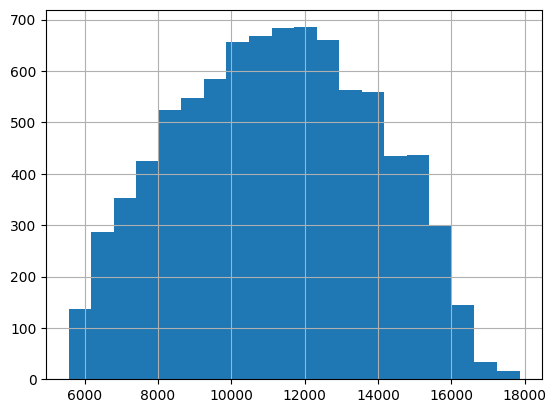

In [71]:
bpat_netgen.value.hist(bins=20)

In [67]:
#mean = sum of values / number of values
bpng_mu = bpat_netgen['value'].mean()
print(bpng_mu)

11216.500229990801


In [68]:
#standard deviation = sqrt of variance = sqrt(sum(square of mean-value for each data point)/(n-1))
#note: denominator is N (vs n-1) if standard dev and variance are calculated from entire population
bpng_sigma = bpat_netgen['value'].std()
print(bpng_sigma)

2661.423566115476


In [73]:
#95% confidence interval is mean +/- 2 stdev (or 1.96 stdev)
#We have the whole population of net generation from 2022 so we don't have to infer anything from a sample
#Unless we treat 2022 data as a sample from which to infer values for another time frame, i.e. the future
#Not a representative sample though if the system changes (new generation sources, old ones decommision, demand changes,)
print ("BPAT's hourly net generation was {} +/- {}".format(bpng_mu,1.96*bpng_sigma))
print(f"BPAT's hourly net generation was {bpng_mu} +/- {1.96*bpng_sigma} 95% of the time")

BPAT's hourly net generation was 11216.500229990801 +/- 5216.390189586334
BPAT's hourly net generation was 11216.500229990801 +/- 5216.390189586334 95% of the time


In [75]:
bpat_netgen = pd.DataFrame(bpat_netgen)
bpat_netgen['outlier'] = bpat_netgen['value'].apply(
        lambda x: 
        True 
        if ( x > bpng_mu + 1.96*bpng_sigma or x < bpng_mu - 1.96*bpng_sigma)  
        else False 
            )


In [76]:
bpat_netgen.outlier.value_counts()

outlier
False    8540
True      156
Name: count, dtype: int64

In [78]:
# line you draw for equal number of cases on either side
bpat_netgen.value.median()

11249.0

In [79]:
bpat_netgen['value'].max()

17858.0

In [80]:
bpat_netgen.count()

datetime     8696
type         8696
type_name    8696
value        8696
outlier      8696
dtype: int64

In [81]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [83]:
bpat_netgen.value.quantile(0.5)

11249.0

In [84]:
len(bpat_netgen)

8696

In [90]:
bpng_dist = bpat_netgen.value.quantile([i/20 for i in range(0,20)])
bpng_dist

0.00     5566.00
0.05     6812.75
0.10     7557.00
0.15     8165.75
0.20     8659.00
0.25     9131.00
0.30     9610.50
0.35    10066.00
0.40    10448.00
0.45    10864.00
0.50    11249.00
0.55    11646.00
0.60    12032.00
0.65    12418.75
0.70    12832.50
0.75    13263.25
0.80    13738.00
0.85    14232.00
0.90    14865.00
0.95    15499.25
Name: value, dtype: float64

In [87]:
bpng_dist.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, 0.0 to 0.95
Series name: value
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [88]:
#bins of 20 percentile cuts

#bpng_dist["quantile"] = bpng_dist.index
#bpng_dist


0.0                                                    5566.0
0.05                                                  6812.75
0.1                                                    7557.0
0.15                                                  8165.75
0.2                                                    8659.0
0.25                                                   9131.0
0.3                                                    9610.5
0.35                                                  10066.0
0.4                                                   10448.0
0.45                                                  10864.0
0.5                                                   11249.0
0.55                                                  11646.0
0.6                                                   12032.0
0.65                                                 12418.75
0.7                                                   12832.5
0.75                                                 13263.25
0.8     

<Axes: >

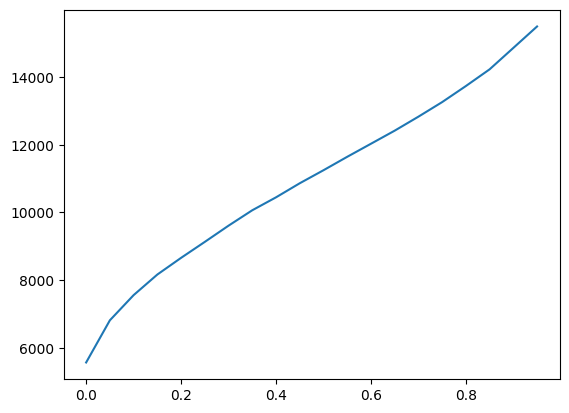

In [91]:
bpng_dist.plot.line(y="quantile", x = "value")

In [92]:
# compare with SUM() OVER in SQL
bpat_netgen["CumValue"] = bpat_netgen.value.cumsum()
bpat_netgen

,datetime,type,type_name,value,outlier,CumValue
139,2023-01-01 00:00:00,NG,Net generation,9792.0,False,9792.0
566,2022-12-31 23:00:00,NG,Net generation,9813.0,False,19605.0
728,2022-12-31 22:00:00,NG,Net generation,10131.0,False,29736.0
1134,2022-12-31 21:00:00,NG,Net generation,10355.0,False,40091.0
1299,2022-12-31 20:00:00,NG,Net generation,10564.0,False,50655.0
...,...,...,...,...,...,...
2501941,2022-01-01 04:00:00,NG,Net generation,14665.0,False,97480296.0
2502227,2022-01-01 03:00:00,NG,Net generation,15047.0,False,97495343.0
2502529,2022-01-01 02:00:00,NG,Net generation,14903.0,False,97510246.0
2502790,2022-01-01 01:00:00,NG,Net generation,14482.0,False,97524728.0


<Axes: >

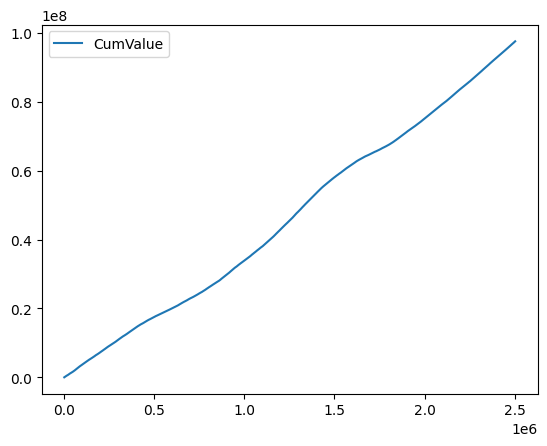

In [93]:
bpat_netgen.plot.line( y = "CumValue")

### Use Python for column arithmetic

In [115]:
bpat_data = pd.DataFrame(bpat_data)
bpat_mu_dict = {'NG':bpat_data.query('type == "NG"')['value'].mean(),
                'D':bpat_data.query('type == "D"')['value'].mean(),
                'TI':bpat_data.query('type == "TI"')['value'].mean(),
                'DF':bpat_data.query('type == "DF"')['value'].mean()}
bpat_data['type_mean'] = bpat_data['type'].apply(lambda t: bpat_mu_dict.get(t))
bpat_data['MeanCentered'] = bpat_data.value - bpat_data.type_mean
bpat_data.head()


,datetime,type,type_name,value,MeanCentered,type_mean
26,2023-01-01 00:00:00,D,Demand,6997.0,326.410346,6670.589654
100,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,562.819541,6694.180459
139,2023-01-01 00:00:00,NG,Net generation,9792.0,-1424.500230,11216.500230
283,2023-01-01 00:00:00,TI,Total interchange,7509.0,-804.616123,8313.616123
351,2022-12-31 23:00:00,D,Demand,6951.0,280.410346,6670.589654


In [116]:
bpat_data.MeanCentered.describe()

count    3.493700e+04
mean    -9.330020e-14
std      1.883980e+03
min     -8.329616e+03
25%     -1.046180e+03
50%     -9.218046e+01
75%      1.122384e+03
max      6.641500e+03
Name: MeanCentered, dtype: float64

## Shape the data

### Set and use an index

In [117]:
bpat_data = bpat_data.set_index('datetime')
bpat_data.head()

,type,type_name,value,MeanCentered,type_mean
datetime,,,,,
2023-01-01 00:00:00,D,Demand,6997.0,326.410346,6670.589654
2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,562.819541,6694.180459
2023-01-01 00:00:00,NG,Net generation,9792.0,-1424.500230,11216.500230
2023-01-01 00:00:00,TI,Total interchange,7509.0,-804.616123,8313.616123
2022-12-31 23:00:00,D,Demand,6951.0,280.410346,6670.589654


In [118]:
len(bpat_data)

34937

In [119]:
bpat_data.reset_index(inplace=True)
bpat_data

,datetime,type,type_name,value,MeanCentered,type_mean
0,2023-01-01 00:00:00,D,Demand,6997.0,326.410346,6670.589654
1,2023-01-01 00:00:00,DF,Day-ahead demand forecast,7257.0,562.819541,6694.180459
2,2023-01-01 00:00:00,NG,Net generation,9792.0,-1424.500230,11216.500230
3,2023-01-01 00:00:00,TI,Total interchange,7509.0,-804.616123,8313.616123
4,2022-12-31 23:00:00,D,Demand,6951.0,280.410346,6670.589654
...,...,...,...,...,...,...
34932,2022-01-01 01:00:00,D,Demand,8977.0,2306.410346,6670.589654
34933,2022-01-01 00:00:00,D,Demand,8535.0,1864.410346,6670.589654
34934,2022-01-01 00:00:00,DF,Day-ahead demand forecast,8899.0,2204.819541,6694.180459
34935,2022-01-01 00:00:00,NG,Net generation,13958.0,2741.499770,11216.500230


In [120]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
bpat_data = bpat_data.set_index('datetime', verify_integrity=True)
#mortality_data

ValueError: Index has duplicate keys: DatetimeIndex(['2023-01-01 00:00:00', '2022-12-31 23:00:00',
               '2022-12-31 22:00:00', '2022-12-31 21:00:00',
               '2022-12-31 20:00:00', '2022-12-31 19:00:00',
               '2022-12-31 18:00:00', '2022-12-31 17:00:00',
               '2022-12-31 16:00:00', '2022-12-31 15:00:00',
               ...
               '2022-01-01 09:00:00', '2022-01-01 08:00:00',
               '2022-01-01 07:00:00', '2022-01-01 06:00:00',
               '2022-01-01 05:00:00', '2022-01-01 04:00:00',
               '2022-01-01 03:00:00', '2022-01-01 02:00:00',
               '2022-01-01 01:00:00', '2022-01-01 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8737, freq=None)

In [121]:
bpat_data = bpat_data.set_index(
    ['datetime','type'], verify_integrity=True)
bpat_data.head()

ValueError: Index has duplicate keys: MultiIndex([('2022-12-31 07:00:00', 'NG'),
            ('2022-12-29 20:00:00',  'D'),
            ('2022-12-29 02:00:00',  'D'),
            ('2022-12-28 09:00:00', 'NG'),
            ('2022-12-28 09:00:00', 'DF'),
            ('2022-12-26 22:00:00', 'DF'),
            ('2022-12-26 04:00:00', 'NG'),
            ('2022-12-24 17:00:00', 'DF'),
            ('2022-12-24 17:00:00',  'D'),
            ('2022-12-23 06:00:00',  'D'),
            ...
            ('2022-01-08 12:00:00',  'D'),
            ('2022-01-07 01:00:00', 'DF'),
            ('2022-01-07 01:00:00',  'D'),
            ('2022-01-06 08:00:00',  'D'),
            ('2022-01-04 21:00:00', 'DF'),
            ('2022-01-04 21:00:00',  'D'),
            ('2022-01-04 04:00:00',  'D'),
            ('2022-01-02 17:00:00', 'DF'),
            ('2022-01-02 17:00:00',  'D'),
            ('2022-01-01 06:00:00',  'D')],
           names=['datetime', 'type'], length=228)

In [122]:
bpat_data.shape

(34937, 6)

### Pivot the data

In [126]:
bpat_wide = bpat_data.pivot(
    columns='type', values=['datetime','value','MeanCentered'])
bpat_wide.head(3)
#multiple values for hour and type. Sum?

datetime                             value                        
type          D         DF         NG  TI       D      DF      NG   TI   
0    2023-01-01        NaT        NaT NaT  6997.0     NaN     NaN  NaN  \
1           NaT 2023-01-01        NaT NaT     NaN  7257.0     NaN  NaN   
2           NaT        NaT 2023-01-01 NaT     NaN     NaN  9792.0  NaN   

     MeanCentered                               
type            D          DF          NG   TI  
0      326.410346         NaN         NaN  NaN  
1             NaN  562.819541         NaN  NaN  
2             NaN         NaN -1424.50023  NaN

In [72]:
mortality_wide.shape

(119, 8)

In [73]:
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

AgeGroup           1-4 Years  10-14 Years  15-19 Years  5-9 Years
Year MeanCentered                                                
1900 105.37584           NaN     0.002983          NaN        NaN
     273.17584           NaN          NaN          NaN   0.004661
     291.87584           NaN          NaN     0.004848        NaN

In [74]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                   death_log              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years 1-4 Years 10-14 Years   
Year                                                                         
1900      0.019838    0.002983    0.004848  0.004661  3.297498    2.474653   
1901      0.016950    0.002736    0.004544  0.004276  3.229170    2.437116   
1902      0.016557    0.002525    0.004215  0.004033  3.218982    2.402261   

                                 outlier                                    \
AgeGroup 15-19 Years 5-9 Years 1-4 Years 10-14 Years 15-19 Years 5-9 Years   
Year                                                                         
1900        2.685563  2.668479      True       False       False     False   
1901        2.657438  2.631038      True       False       False     False   
1902        2.624798  2.605628      True       False       False     False   

         CumDeathRate                                   MeanCentered  \
AgeGroup    1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years   
Year                                                                   
1900           1983.8     59864.0     71209.1   46070.0   1790.87584   
1901           3678.8     60137.6     71663.5   46497.6   1502.07584   
1902           5334.5     60390.1     72085.0   46900.9   1462.77584   

                                             
AgeGroup 10-14 Years 15-19 Years  5-9 Years  
Year                                         
1900       105.37584   291.87584  273.17584  
1901        80.67584   261.47584  234.67584  
1902        59.57584   228.57584  210.37584

In [75]:
mortality_wide.to_csv("mortality_wide.csv")

In [76]:
mortality_wide.shape

(119, 20)

### Melt the data

In [77]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033


In [78]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,1-4 Years,10-14 Years,15-19 Years,5-9 Years
0,1900,0.019838,0.002983,0.004848,0.004661
1,1901,0.016950,0.002736,0.004544,0.004276
2,1902,0.016557,0.002525,0.004215,0.004033
3,1903,0.015421,0.002682,0.004341,0.004147


In [79]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['1-4 Years','5-9 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,0.019838
1,1901,1-4 Years,0.016950
...,...,...,...
236,2017,5-9 Years,0.000116
237,2018,5-9 Years,0.000115


## Analyze the data

### Group the data

In [80]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
AgeGroup,,,,,,
1-4 Years,1959,0.003832,2.193591,0.193277,37353.117647,190.301891
10-14 Years,1959,0.000938,1.772540,0.000000,67911.569748,-99.154412
15-19 Years,1959,0.001774,2.134860,0.000000,85460.104202,-15.549370
5-9 Years,1959,0.001173,1.795091,0.000000,56497.440336,-75.598109


In [81]:
mortality_data.groupby('AgeGroup').median()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
AgeGroup,,,,,,
1-4 Years,1959,0.001091,2.037825,False,42409.4,-83.82416
10-14 Years,1959,0.000446,1.649335,False,69110.8,-148.32416
15-19 Years,1959,0.001069,2.028978,False,87096.4,-86.02416
5-9 Years,1959,0.000484,1.684845,False,58040.5,-144.52416


In [82]:
mortality_data.groupby('Year').median().head(4)

,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
Year,,,,,
1900,0.004755,2.677021,False,52967.00,282.52584
1901,0.004410,2.644238,False,53317.60,248.07584
1902,0.004124,2.615213,False,53645.50,219.47584
1903,0.004244,2.627662,False,53986.95,231.47584


In [83]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  death_log  outlier  CumDeathRate  MeanCentered
Year AgeGroup                                                              
1900 1-4 Years            1          1        1             1             1
     10-14 Years          1          1        1             1             1
     15-19 Years          1          1        1             1             1
     5-9 Years            1          1        1             1             1
1901 1-4 Years            1          1        1             1             1

### Aggregate the data

In [84]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

DeathRate                                        
                 mean    median       min       max       std
AgeGroup                                                     
1-4 Years    0.003832  0.001091  0.000240  0.019838  0.005005
10-14 Years  0.000938  0.000446  0.000139  0.003751  0.000884
15-19 Years  0.001774  0.001069  0.000448  0.007774  0.001384
5-9 Years    0.001173  0.000484  0.000114  0.004661  0.001275

In [86]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup')?

SyntaxError: invalid syntax (<ipython-input-86-7348e6205b1b>, line 1)

In [89]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [91]:
AgeGS["outlier"].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.193277,False,0.396538,2
10-14 Years,0.000000,False,0.000000,1
15-19 Years,0.000000,False,0.000000,1
5-9 Years,0.000000,False,0.000000,1


In [92]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.003832,0.001091,0.005005,117
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117
5-9 Years,0.001173,0.000484,0.001275,115


In [93]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006832,0.004124,0.006527,0.002525,0.016557,0.000043,4


In [94]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

0.0022257500000000003

In [95]:
fun_1q(mortality_wide[['1-4 Years']])

1-4 Years    0.005773
Name: 0.75, dtype: float64

## Visualize the data

In [96]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033
1903,0.015421,0.002682,0.004341,0.004147
1904,0.015915,0.003052,0.004714,0.004250
...,...,...,...,...
2014,0.000240,0.000140,0.000455,0.000115
2015,0.000249,0.000146,0.000483,0.000117
2016,0.000253,0.000146,0.000512,0.000122


<AxesSubplot:>

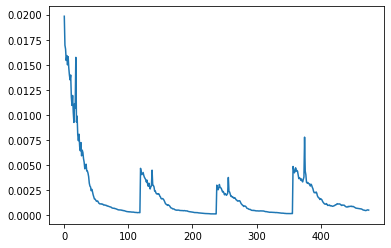

In [97]:
mortality_data['DeathRate'].plot()

In [99]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033
1903,0.015421,0.002682,0.004341,0.004147
1904,0.015915,0.003052,0.004714,0.004250
...,...,...,...,...
2014,0.000240,0.000140,0.000455,0.000115
2015,0.000249,0.000146,0.000483,0.000117
2016,0.000253,0.000146,0.000512,0.000122


<AxesSubplot:xlabel='Year'>

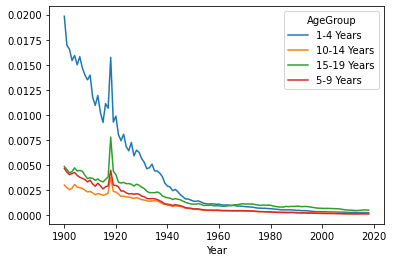

In [98]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [100]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])


,mean,median,std
AgeGroup,,,
1-4 Years,0.003832,0.001091,0.005005
10-14 Years,0.000938,0.000446,0.000884
15-19 Years,0.001774,0.001069,0.001384
5-9 Years,0.001173,0.000484,0.001275


In [ ]:
mortality_data.plot.

<AxesSubplot:ylabel='AgeGroup'>

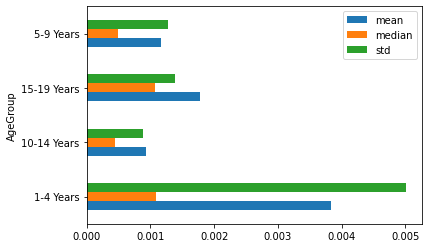

In [101]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

In [103]:
import seaborn as sns

<AxesSubplot:xlabel='AgeGroup', ylabel='DeathRate'>

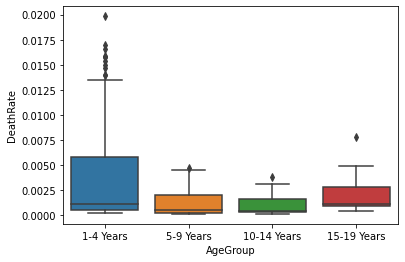

In [104]:
sns.boxplot(data=mortality_data, 
             y='DeathRate', x='AgeGroup')

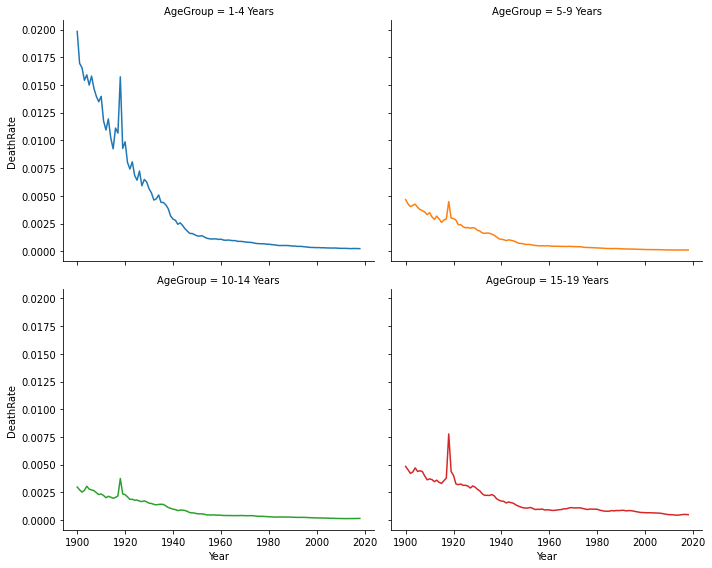

In [105]:
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=2, legend=False)